In [5]:
from collections import defaultdict
import random

import numpy as np

from googol_game import Game
from agent import SarsaAgent, QAgent, OptimalAgent
from plot_utils import setDefault, plotQValues

import pickle as pkl

import matplotlib.pyplot as plt
%matplotlib inline

set_default()

In [2]:
reward_fn =lambda win: 10 if win else -1

In [3]:
game = Game(lo=1, hi=1000, n_states=50, replace=False, reward_fn=reward_fn)

In [8]:
agent = QAgent(alpha=0.1, gamma=0.75, eps=0.1, eps_decay=1e-5, s_cost=0)

n_games = 1_500_000

game.autoTrain(agent, n_games, False)

print("Win Percentage: {:.3}".format(agent.wins/n_games))

Win Percentage: 0.108


In [ ]:
agent = OptimalAgent(50)

n_games = 100_000

game.autoTrain(agent, n_games, False)

print("Win Percentage: {:.3}".format(agent.wins/n_games))

In [ ]:
n_games = 10000

agent.historyReset()
game.autoTrain(agent, n_games, False)

print("Win Percentage: {:.3}".format(agent.wins/n_games))
    
plt.figure(figsize=(20,12))
plt.scatter(np.arange(len(agent.final_state)), agent.final_state)
plt.ylabel("Final State")
plt.xlabel("Time")
plt.title("Final State vs Time")

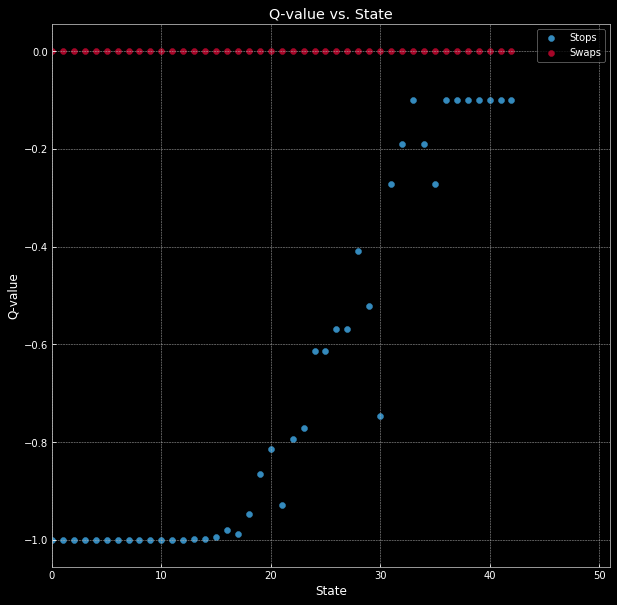

In [40]:
plotQValues(agent, 850, 50)

In [31]:
with open('agent_values/q__a1_g75_e1_d1e5_s0.pkl', 'wb') as handle:
    pkl.dump(dict(agent.Q), handle)

In [26]:
with open('agent_values/q__a1_g75_e1_d1e5_s0.pkl', 'rb') as handle:
    qq = pkl.load(handle)